In [83]:
!pip install xgboost

     |████████████████████████████████| 148.9 MB 175 kB/s  eta 0:00:01    |█████████████████               | 79.5 MB 2.3 MB/s eta 0:00:31     |██████████████████▊             | 87.2 MB 20.6 MB/s eta 0:00:04     |███████████████████▏            | 89.3 MB 20.6 MB/s eta 0:00:03     |██████████████████████████████▎ | 141.0 MB 23.8 MB/s eta 0:00:01


In [84]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection  import GridSearchCV

# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [127]:
#AMPs_df = pd.read_pickle('../../datasets/AMPsNonAMPs_df.239.plk')
AMPs_df = pd.read_pickle('../../datasets/AMPsNonAMPs_df.plk')
AMPs_df

,ID,Sequence,length,class,reps
0,EN92515250|C|B3FJD7|phage 201phi2-1 lysin,MAKKSVPLRKPAGSDGQGNIKVPGGPVVLDLGDFDDIFGPMESESP...,2337,0,"[0.0032203220762312412, 0.07328620553016663, 0..."
1,EN54061055|C|F8SJ56|phage PhiPA3 lysin,MASKKTTLPKPKGINPQGSIVQLDLDDFDDLFDEDFGLPKKNSPYT...,2319,0,"[0.0027930964715778828, 0.06916013360023499, 0..."
2,EN4815120|C|Q8SCY1|phage phiKZ lysin,MAKKVTLPKGQTGATGTTLGQAGNILDLSDVDDIFGDTPKAKKGSP...,2237,0,"[0.0023172732908278704, 0.05406315624713898, 0..."
3,EN3016141|D|D2J8A7|bacteriocin,MAETIKGLRIDLSLKDMGVGRSITELKRSFRTLNSDLKVSSKNFEY...,1619,0,"[0.014644640497863293, 0.07187927514314651, 0...."
4,EN9175723|BD|Q93IM3|bacteriocin,MAKKKNTYKVPSIIALTLAGTALTTHHAQAADKTQDQSTNKNILND...,1564,0,"[0.0062357354909181595, 0.01848522014915943, 0..."
...,...,...,...,...,...
42440,UniRef50_A0A151HEL5 Zinc finger C3HC4 type (R...,GLYFRPRRRASS,12,1,"[0.0483490452170372, -0.007824046537280083, -0..."
42441,UniRef50_K2MU79 Retrotransposon hot spot (RHS)...,MESNPMTLVGCG,12,1,"[0.047337695956230164, -0.013988062739372253, ..."
42442,UniRef50_A0A1E1IUT2 Flagellar calcium-binding ...,IRCVGHWMQAEH,12,1,"[0.04697670415043831, -0.027571065351366997, -..."
42443,UniRef50_A0A0S4ITT4 Dopa decarboxylase putati...,APWSASTLHCPG,12,1,"[0.04749748483300209, 0.005815288983285427, -0..."


In [128]:
X= np.array(AMPs_df['reps'].to_list())
y= np.array(AMPs_df['class'].to_list())

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
def confusion_Matrix(classifier, X_test, y_test):
    class_names = ['AMPs', 'NonAMPs']

    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                display_labels = class_names,
                                cmap=plt.cm.Blues, xticks_rotation='vertical')

    disp.ax_.set_title(" Confusion Matrix")

    print(disp.confusion_matrix)
    plt.grid(False)
    plt.show()

# RF

# SVM

# Gradient Boosting Classifier

In [58]:
n_estimators=200
original_params = {'n_estimators': 200, 'max_leaf_nodes': 4, 'max_depth': 3, 'random_state': 2,
                   'min_samples_split': 5}

In [120]:
model = GradientBoostingClassifier(n_estimators= 300, max_leaf_nodes= 4, max_depth= 3)
model.fit(X_train, y_train)
# make a single prediction

GradientBoostingClassifier(max_leaf_nodes=4, n_estimators=300)

In [121]:
# get predition 
pred = model.predict(X_test)
pred

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        27
           1       0.70      0.76      0.73        21

    accuracy                           0.75        48
   macro avg       0.75      0.75      0.75        48
weighted avg       0.75      0.75      0.75        48

Accuracy:0.75
[[20  7]
 [ 5 16]]


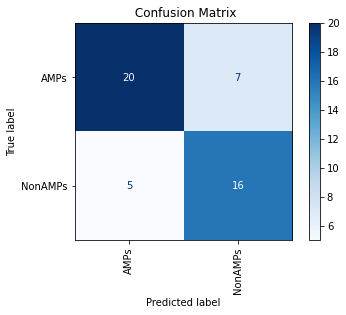

In [122]:

print(classification_report(y_test,pred))
print("Accuracy:"+str(accuracy_score(y_test, pred)))
confusion_Matrix(model, X_test, y_test)

In [ ]:
#for pred in est:
#    plt.plot(y_test, pred, color='r', alpha=0.1)
test_score = np.empty(len(model.estimators_))
for i, pred in enumerate(model.staged_predict(X_test)): 
    test_score[i] = model.loss_(y_test, pred) 
    
plt.plot(np.arange(n_estimators) + 1, test_score, label='Test')
#plt.plot(np.arange(n_estimators) + 1, model.train_score_, label='Train')

## Hyperparameter Tuning
hyperparameters to tune, perhaps the most important are as follows:

* The number of trees or estimators in the model.
* The learning rate of the model.
* The row and column sampling rate for stochastic models.
* The maximum tree depth.
* The minimum tree weight.
* The regularization terms alpha and lambda.

How to configure or tune the configuration of gradient boosting algorithm?

In [130]:
X_train.shape

(33956, 1900)

In [ ]:
#param_grid = {'learning_rate': [0.1, 0.05, 0.02, 0.01],'n_estimators': [100,200,500,1000],
#              'max_depth': [4, 6], 'min_samples_leaf': [3, 5, 9, 17], 'max_features': [1.0, 0.3, 0.1]}
#est = GradientBoostingClassifier() 
param_grid =  {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
               "n_estimators": [100,200,500,1000],
                 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
                 "min_child_weight" : [ 1, 3, 5, 7 ],
                 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

XGBmodel = XGBClassifier( n_jobs=40, random_state=42, verbosity=0)
gs_XGBmodel_cv = GridSearchCV(XGBmodel, param_grid, cv=10).fit(X_train,y_train) 
gs_XGBmodel_cv.best_params_

In [ ]:
score = cross_val_score(gs_XGBmodel_cv.best_estimator_, X, y, scoring='accuracy', cv=5).mean()#
print('Cross-Validation Accuracy:', score, '\n', '\n')

In [ ]:
gs_XGBmodel_cv.best_estimator_.save_model('gs_XGBmodel_cv.best_estimator_.model')

# Random Forests in XGBoost

## Evaluate the model